- 1. Use Logistic regression
- 2. Remove br
- 3. Remove Repeated code
- 5. use the accuracy and classification reporting functions
- 6. make sure that COde is Explainable 

In [75]:
import numpy as np
import pandas as pd

In [76]:
df=pd.read_csv("IMDB Dataset.csv")

# Data Cleaning

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25526 entries, 0 to 25525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25526 non-null  object
 1   sentiment  25526 non-null  object
dtypes: object(2)
memory usage: 399.0+ KB


In [78]:
df.duplicated().sum()

109

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25417 entries, 0 to 25525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25417 non-null  object
 1   sentiment  25417 non-null  object
dtypes: object(2)
memory usage: 595.7+ KB


In [81]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [82]:
df.sample(5)

,review,sentiment
515,This is one of the best TV productions of a mu...,positive
24739,This HTV series is beautiful. I strongly recom...,positive
13172,"One thing about Hollywood, someone has a succe...",positive
5987,Having read the books and seen the 1982 Anthon...,negative
1492,I found this movie to be extremely delightful....,positive


# EDA and Feature Engneering

In [83]:
df["sentiment"].value_counts()

sentiment
positive    12741
negative    12676
Name: count, dtype: int64

In [84]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
#Number of Character 
df['num_char']=df['review'].apply(len)

In [86]:
# Number of Words
df['num_words']=df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [87]:
# Number of Sentences
df['num_sentences']=df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [88]:
df.sample(4)

,review,sentiment,num_char,num_words,num_sentences
2746,Father and son communicate very little. IN fac...,positive,723,158,9
14482,One question that must be asked immediately is...,positive,2756,659,15
2810,"Oh my God, I was so expecting something more e...",negative,881,196,13
14441,"this movie has a decent story in my opinion,ve...",positive,726,146,2


In [89]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,25417.000000,25417.000000,25417.000000
mean,1311.683598,279.807884,10.707440
std,988.946746,207.681858,7.633634
min,52.000000,11.000000,1.000000
25%,698.000000,151.000000,6.000000
50%,968.000000,208.000000,9.000000
75%,1597.000000,341.000000,13.000000
max,10363.000000,2300.000000,118.000000


In [90]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
# lower Case & Word_tokenizer
import nltk
from nltk.tokenize import word_tokenize

# convert in sentence
df['review'] = df['review'].apply(lambda x: word_tokenize(x.lower()))

In [92]:
df['review'][0]

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'they',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 '.',
 'trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'it',
 'is',
 'called',
 'oz',
 'as',


In [93]:
df['review'] = df['review'].apply(lambda x: ' '.join([i for i in x if i.isalnum()]))

In [94]:
df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you be hooked they are right as this is exactly what happened with br br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the br br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far br br i would say the main appeal of the show is due to the fact that it goes where other shows would dare forget pretty 

In [95]:
df['review'] = df['review'].apply(lambda x: ' '.join([i for i in i.lower() no x.split() if t in stopwords.words('english') and i not in string.punctuation]))

In [96]:
df['review'][0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far br br would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches

In [97]:
import string
from nltk.stem import PorterStemmer

# Assuming df is your DataFrame
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
df['review'] =df['review'].apply(lambda x: ' '.join([ps.stem(i) for i in x.split()]))

[nltk_data] Downloading package stopwords to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Debasish
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
df.sample(5)

,review,sentiment,num_char,num_words,num_sentences
2871,unfortun first busbi berkeley movi ever watch ...,negative,913,201,7
10772,grew scoobi kinda hate scrappi love daphn feel...,negative,618,143,5
956,great premis poor execut cast great actor wate...,negative,292,63,3
614,dramatis wild novel john osborn condens event ...,positive,1335,275,8
5401,first review two disc set came togeth wonderla...,positive,1561,313,7


In [100]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=8,background_color='white')

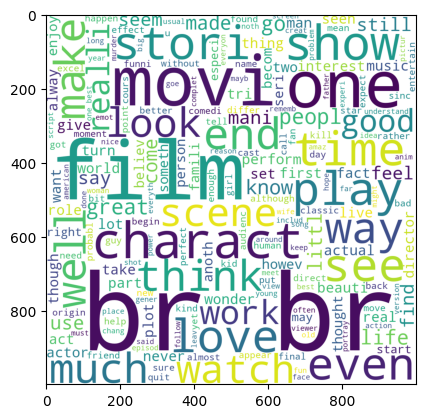

In [101]:
import matplotlib.pyplot as plt
sentiment_wc=wc.generate(df[df["sentiment"]=='positive']['review'].str.cat(sep=" "))
plt.imshow(sentiment_wc)

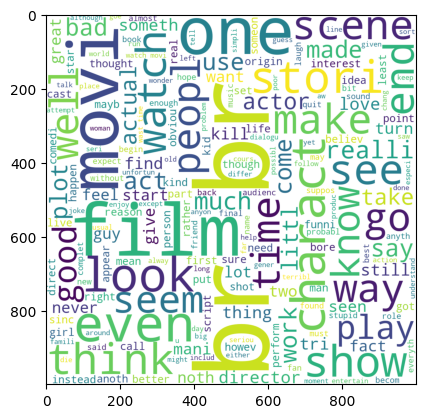

In [102]:
sentiment_wc=wc.generate(df[df["sentiment"]=='negative']['review'].str.cat(sep=" "))
plt.imshow(sentiment_wc)

In [103]:
positive=[]
for i in df[df['sentiment']=='positive']['review'].to_list():
    for word in i.split():
        positive.append(word)

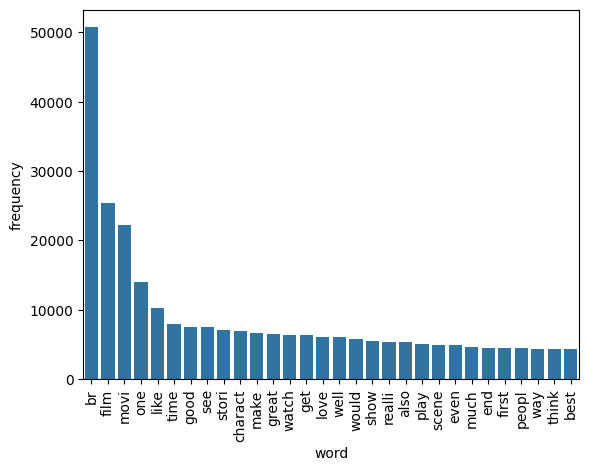

In [104]:
from collections import Counter
word_counter=Counter(positive)
most_common_word=word_counter.most_common(30)
df1=pd.DataFrame(most_common_word,columns=['word','frequency'])

import seaborn as sns
sns.barplot(data=df1,x='word',y='frequency')
plt.xticks(rotation='vertical')
plt.show()

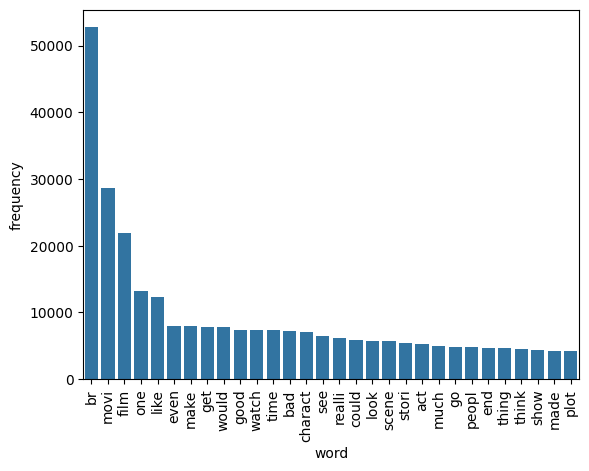

In [106]:
negative=[]
for i in df[df['sentiment']=='negative']['review']:
    for word in i.split():
        negative.append(word)
        
word_counter=Counter(negative)
most_common_word=word_counter.most_common(30)
df1=pd.DataFrame(most_common_word,columns=['word','frequency'])

import seaborn as sns
sns.barplot(data=df1,x='word',y='frequency')
plt.xticks(rotation='vertical')
plt.show()      


<Axes: >

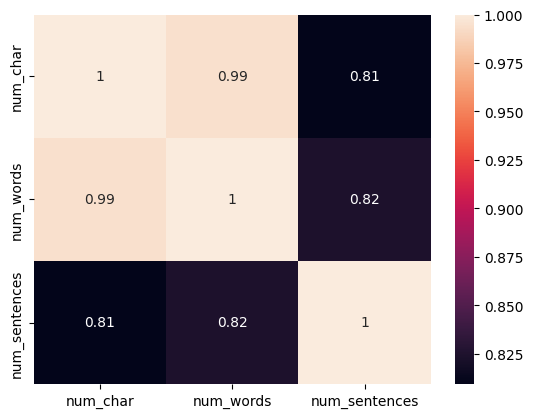

In [132]:
df2=df.select_dtypes(include=['number'])
sns.heatmap(df2.corr(),annot=True)

In [113]:
df_copy=df.copy()

In [119]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25417 entries, 0 to 25525
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         25417 non-null  object
 1   sentiment      25417 non-null  int64 
 2   num_char       25417 non-null  int64 
 3   num_words      25417 non-null  int64 
 4   num_sentences  25417 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 2.2+ MB


In [117]:
df_copy['sentiment']=df_copy['sentiment'].replace(to_replace='positive',value=1)
df_copy['sentiment']=df_copy['sentiment'].replace(to_replace='negative',value=0)

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_22760\2691825043.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['sentiment']=df_copy['sentiment'].replace(to_replace='negative',value=0)


In [127]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25417 entries, 0 to 25525
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         25417 non-null  object
 1   sentiment      25417 non-null  int64 
 2   num_char       25417 non-null  int64 
 3   num_words      25417 non-null  int64 
 4   num_sentences  25417 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 2.2+ MB


In [129]:
df_copy['sentiment'].values.shape

(25417,)

# model Building

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_copy is your DataFrame and 'sentiment' is your label column
# df_copy = pd.read_csv('path_to_your_dataset.csv')

# Preprocessing text and feature extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df_copy['review']).toarray()  # Use the actual text column name
y = df_copy['sentiment'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
lr = LogisticRegression(solver='liblinear', penalty='l1')
nb = MultinomialNB()
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Dictionary to store models
clfs = {
    'SVC': svc,
    'Logistic Regression': lr,
    'Naive Bayes': nb,
    'XGBoost': xgb_model
}

# Function to train and evaluate model
def train_and_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')        # Use weighted average for multi-class
    f1 = f1_score(y_test, y_pred, average='weighted')                # Use weighted average for multi-class
    report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])  # Update class names as needed
    
    return accuracy, precision, recall, f1, report

# Train and evaluate each model
results = {}
for name, clf in clfs.items():
    accuracy, precision, recall, f1, report = train_and_evaluate(clf, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': report
    }

# Display results
for name, metrics in results.items():
    print(f"\n{name}:\n")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    


SVC:

Accuracy: 0.8710
Precision: 0.8713
Recall: 0.8710
F1 Score: 0.8710
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.86      0.87      2578
     Class 1       0.86      0.88      0.87      2506

    accuracy                           0.87      5084
   macro avg       0.87      0.87      0.87      5084
weighted avg       0.87      0.87      0.87      5084


Logistic Regression:

Accuracy: 0.8749
Precision: 0.8756
Recall: 0.8749
F1 Score: 0.8749
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.86      0.87      2578
     Class 1       0.86      0.89      0.88      2506

    accuracy                           0.87      5084
   macro avg       0.88      0.88      0.87      5084
weighted avg       0.88      0.87      0.87      5084


Naive Bayes:

Accuracy: 0.8409
Precision: 0.8411
Recall: 0.8409
F1 Score: 0.8409
Classification Report:
              precision    reca

In [134]:
#to excel
result=pd.DataFrame(results)
file="Result.xlsx"
result.to_excel(file)

In [135]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('svc.pkl','wb'))

In [136]:
import joblib
joblib.dump(svc,"svc.jablib")

['svc.jablib']

In [1]:
!pip install imdbpy


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from imdb import IMDb

def fetch_reviews(imdb_id, max_reviews=100):
    ia = IMDb()
    # IMDbPY expects the ID without 'tt'
    movie = ia.get_movie(imdb_id.lstrip('tt'))
    ia.update(movie, 'reviews')
    reviews = movie.get('reviews', [])
    return [r['content'] for r in reviews[:max_reviews]]

# Usage
reviews = fetch_reviews('tt0499549')  # The Matrix
print(reviews)



[]


In [12]:
import requests
from bs4 import BeautifulSoup

def fetch_reviews(imdb_id, max_reviews=20):
    url = f'https://www.imdb.com/title/{imdb_id}/reviews?ref_=tt_ururv_sm'
    headers = {'User-Agent': 'Mozilla/5.0'}
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    review_elements = soup.select('.text.show-more__control')
    return [r.get_text(strip=True) for r in review_elements[:max_reviews]]

reviews = fetch_reviews('tt0499549')
print(reviews)


[]
